In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\Anna\\Documents\\UniPi\\II Sem\\Social Network Analysis\\SNA\\data_updated_try_1.csv")
df.head()

,Unnamed: 0,accept_rate,display_name,link,profile_image,reputation,user_id,user_type,0,views,0.2,hashtag,ht1,ht2,ht3,ht4;
0,0,100,Jeff Atwood,https://stackoverflow.com/users/1/jeff-atwood,https://www.gravatar.com/avatar/51d623f33f8b83...,46465.0,1,registered,1.217514e+09,536898.0,1217547659,c#,.net,datetime,NaN,;
1,1,100,Jeff Atwood,https://stackoverflow.com/users/1/jeff-atwood,https://www.gravatar.com/avatar/51d623f33f8b83...,46465.0,1,registered,1.217514e+09,313519.0,1228321003,sql,sql-server,parameters,NaN,;
2,2,100,Jeff Atwood,https://stackoverflow.com/users/1/jeff-atwood,https://www.gravatar.com/avatar/51d623f33f8b83...,46465.0,1,registered,1.217514e+09,146098.0,1217548537,c#,datetime,time,datediff,relative-time-span;
3,3,100,Jeff Atwood,https://stackoverflow.com/users/1/jeff-atwood,https://www.gravatar.com/avatar/51d623f33f8b83...,46465.0,1,registered,1.217514e+09,15793.0,1224837586,c#,.net,delegates,lambda,;
4,4,100,Jeff Atwood,https://stackoverflow.com/users/1/jeff-atwood,https://www.gravatar.com/avatar/51d623f33f8b83...,46465.0,1,registered,1.217514e+09,27940.0,1219328321,sql-server,sql-server-2005,deadlock,NaN,;


In [3]:
df_work=df

In [5]:
df_work = df_work.drop(["Unnamed: 0", '0', 'display_name',"link", "profile_image", "user_id", "user_type", "0.2"], axis=1)
df_work.head()

,accept_rate,reputation,views,hashtag,ht1,ht2,ht3,ht4;
0,100,46465.0,536898.0,c#,.net,datetime,NaN,;
1,100,46465.0,313519.0,sql,sql-server,parameters,NaN,;
2,100,46465.0,146098.0,c#,datetime,time,datediff,relative-time-span;
3,100,46465.0,15793.0,c#,.net,delegates,lambda,;
4,100,46465.0,27940.0,sql-server,sql-server-2005,deadlock,NaN,;


In [7]:
# for hashtags only
d = df_work[['hashtag', 'ht1', 'ht2', 'ht3', 'ht4;']]

In [8]:
df_work['count'] = 0

In [ ]:
count=0
pop=-1
for n in g.nodes():
    if g.degree(n)>400:
        count=count+1
        pop=n
        print(pop, 'degree:', g.degree(pop))
print('count:', count)

In [33]:
print(df_work.iloc[2847], df_work.iloc[3683], df_work.iloc[3733], df_work.iloc[6102], df_work.iloc[9935])

accept_rate         NaN
reputation          795
views             16574
hashtag              c#
ht1                .net
ht2                 wpf
ht3            winforms
ht4;                  ;
count                 4
ar                  NaN
Name: 2847, dtype: object accept_rate          92
reputation         7421
views               884
hashtag              c#
ht1                .net
ht2             asp.net
ht3            webforms
ht4;                  ;
count                 4
ar                   92
Name: 3683, dtype: object accept_rate             50
reputation          116592
views                 1315
hashtag                 c#
ht1                   .net
ht2                asp.net
ht3                   rest
ht4;           webrequest;
count                    4
ar                      50
Name: 3733, dtype: object accept_rate                   71
reputation                  1232
views                        324
hashtag                       c#
ht1                         .net
ht2    

In [10]:
# the most frequent ones
ht_li = ['c#', '.net', 'wpf', 'winforms', 'asp.net', 'webforms', 'rest', 'webrequest', 'anonymous-access', 'vb.net', 'clr']

In [11]:
def isNaN(num):
    return num != num

In [12]:
def compare(list1, list2):
    v=0
    for i in list1:
        if i!=';' and isNaN(i)==False:
            if i in list2:
                v+=1
    return v

In [13]:
for i in range (0, 10001):
    list1=[]
    
    for p in range (0, 4):
        list1.append(d.loc[i][p])
        #print(list1)
    df_work.loc[i, 'count'] = compare(list1, ht_li)

In [23]:
df_work[413:418]

,accept_rate,reputation,views,hashtag,ht1,ht2,ht3,ht4;,count
413,74,11387.0,5.040000e+02,.net,namespaces,NaN,NaN,;,1
414,-1,455.0,1.535562e+09,circleci,go-modules,NaN,NaN,;,0
415,53,11463.0,2.562690e+05,.net,entity-framework,linq-to-sql,NaN,;,1
416,53,11463.0,7.465600e+04,html,css,NaN,NaN,;,0
417,53,11463.0,5.580000e+02,.net,unit-testing,nunit,NaN,;,1


In [27]:
# bags
for i in range (0,10001):
    if df_work.iloc[i]['accept_rate'] == 'Rob G.' or  df_work.iloc[i]['accept_rate'] == 'Cade' or df_work.iloc[i]['accept_rate'] == 'Joe Mahoney' or df_work.iloc[i]['accept_rate'] == 'Andrea Bertani': 
         df_work.loc[i, 'accept_rate'] = -1

In [28]:
df_work['ar'] = df_work['accept_rate'].astype(float)

In [29]:
corr = df_work[['ar', 'reputation', 'views', 'count']].corr()

In [35]:
df_work.head(20)

,accept_rate,reputation,views,hashtag,ht1,ht2,ht3,ht4;,count,ar
0,100,46465.0,536898.0,c#,.net,datetime,NaN,;,2,100.0
1,100,46465.0,313519.0,sql,sql-server,parameters,NaN,;,0,100.0
2,100,46465.0,146098.0,c#,datetime,time,datediff,relative-time-span;,1,100.0
3,100,46465.0,15793.0,c#,.net,delegates,lambda,;,2,100.0
4,100,46465.0,27940.0,sql-server,sql-server-2005,deadlock,NaN,;,0,100.0
5,100,46465.0,121204.0,javascript,html,iframe,framebusting,;,0,100.0
6,100,46465.0,10912.0,sql,sql-server,date,gaps-and-islands,;,0,100.0
7,100,46465.0,14175.0,javascript,jquery,validation,internationalization,;,0,100.0
8,100,46465.0,59187.0,iis-7,https,url-rewriting,url-rewrite-module,;,0,100.0
9,100,46465.0,73915.0,security,language-agnostic,captcha,NaN,;,0,100.0


In [32]:
corr

,ar,reputation,views,count
ar,1.000000,-0.125617,-0.154986,-0.040419
reputation,-0.125617,1.000000,-0.020026,0.103814
views,-0.154986,-0.020026,1.000000,-0.014001
count,-0.040419,0.103814,-0.014001,1.000000


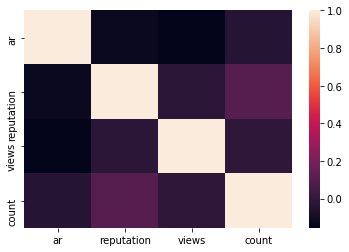

In [31]:
sns.heatmap(corr)